In [1]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(16, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

Epoch 1/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5320 - accuracy: 0.7569 - val_loss: 0.5144 - val_accuracy: 0.7868
Epoch 2/100
536/536 [==============================] - 0s 721us/step - loss: 0.4819 - accuracy: 0.7975 - val_loss: 0.4852 - val_accuracy: 0.8008
Epoch 3/100
536/536 [==============================] - 0s 750us/step - loss: 0.4591 - accuracy: 0.8033 - val_loss: 0.4669 - val_accuracy: 0.7997
Epoch 4/100
536/536 [==============================] - 0s 743us/step - loss: 0.4437 - accuracy: 0.8072 - val_loss: 0.4541 - val_accuracy: 0.8023
Epoch 5/100
536/536 [==============================] - 0s 744us/step - loss: 0.4330 - accuracy: 0.8104 - val_loss: 0.4455 - val_accuracy: 0.8035
Epoch 6/100
536/536 [==============================] - 0s 699us/step - loss: 0.4248 - accuracy: 0.8130 - val_loss: 0.4387 - val_accuracy: 0.8042
Epoch 7/100
536/536 [==============================] - 0s 706us/step - loss: 0.4176 - accuracy: 0.8162 - val_loss: 0.4325 - val_accu

536/536 [==============================] - 0s 699us/step - loss: 0.3246 - accuracy: 0.8643 - val_loss: 0.3647 - val_accuracy: 0.8455
Epoch 58/100
536/536 [==============================] - 0s 665us/step - loss: 0.3244 - accuracy: 0.8660 - val_loss: 0.3649 - val_accuracy: 0.8463
Epoch 59/100
536/536 [==============================] - 0s 682us/step - loss: 0.3242 - accuracy: 0.8645 - val_loss: 0.3645 - val_accuracy: 0.8451
Epoch 60/100
536/536 [==============================] - 0s 669us/step - loss: 0.3238 - accuracy: 0.8642 - val_loss: 0.3645 - val_accuracy: 0.8463
Epoch 61/100
536/536 [==============================] - 0s 706us/step - loss: 0.3238 - accuracy: 0.8651 - val_loss: 0.3643 - val_accuracy: 0.8466
Epoch 62/100
536/536 [==============================] - 0s 672us/step - loss: 0.3237 - accuracy: 0.8662 - val_loss: 0.3645 - val_accuracy: 0.8482
Epoch 63/100
536/536 [==============================] - 0s 677us/step - loss: 0.3231 - accuracy: 0.8643 - val_loss: 0.3641 - val_accuracy

KeyError: 'acc'

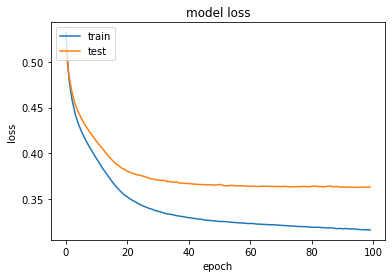

In [2]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [3]:
print(score)

0.8595
